In [1]:
#notebook : https://www.kaggle.com/code/kavyasmallika/multilayer-perceptron-from-scratch-bde015

In [2]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Text(0.5, 1.0, 'Petal Sample')

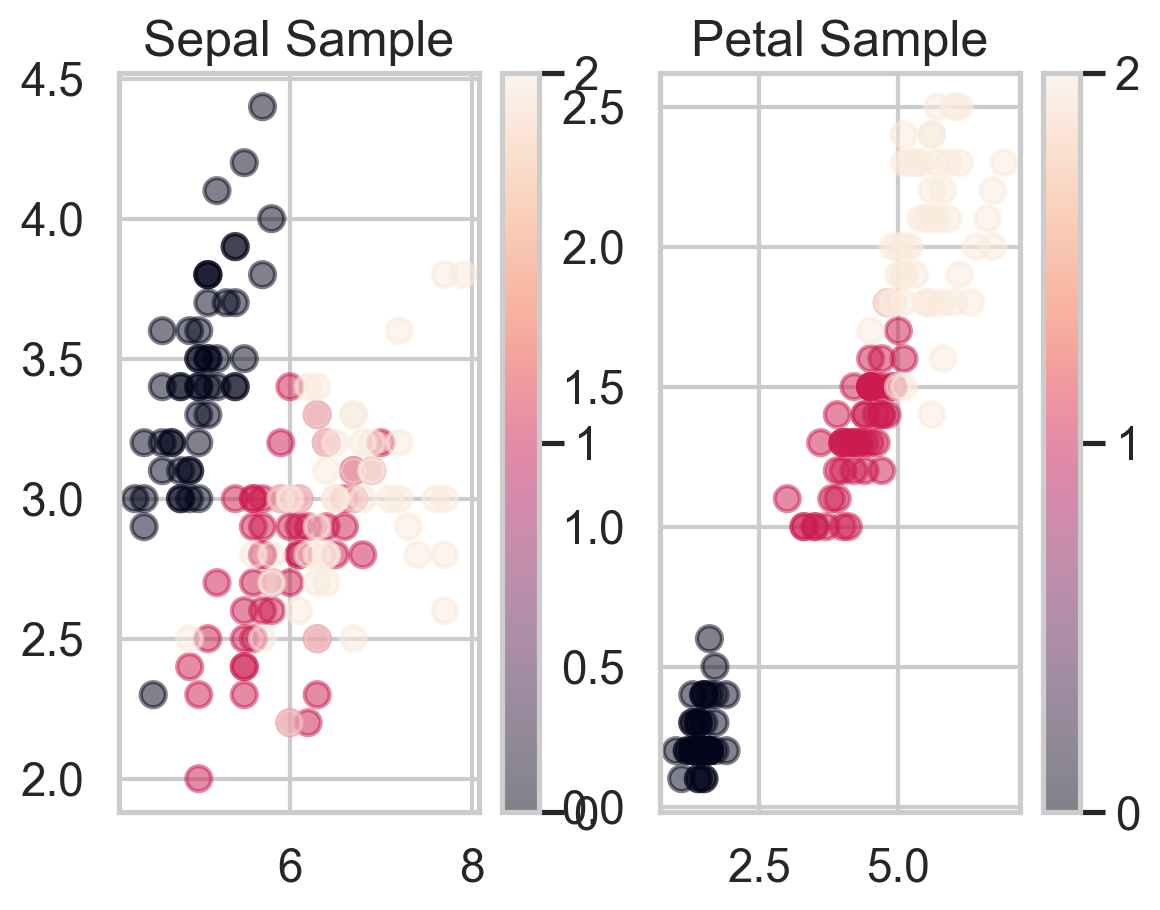

In [4]:
n_samples, n_features = iris_data.data.shape

plt.subplot(1, 2, 1)
scatter_plot = plt.scatter(iris_data.data[:,0], iris_data.data[:,1], alpha=0.5, 
                           c=iris_data.target) 
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Sepal Sample')

plt.subplot(1, 2, 2)
scatter_plot_2 = plt.scatter(iris_data.data[:,2], iris_data.data[:,3], alpha=0.5, 
                           c=iris_data.target)
plt.colorbar(ticks=([0, 1, 2]))
plt.title('Petal Sample')

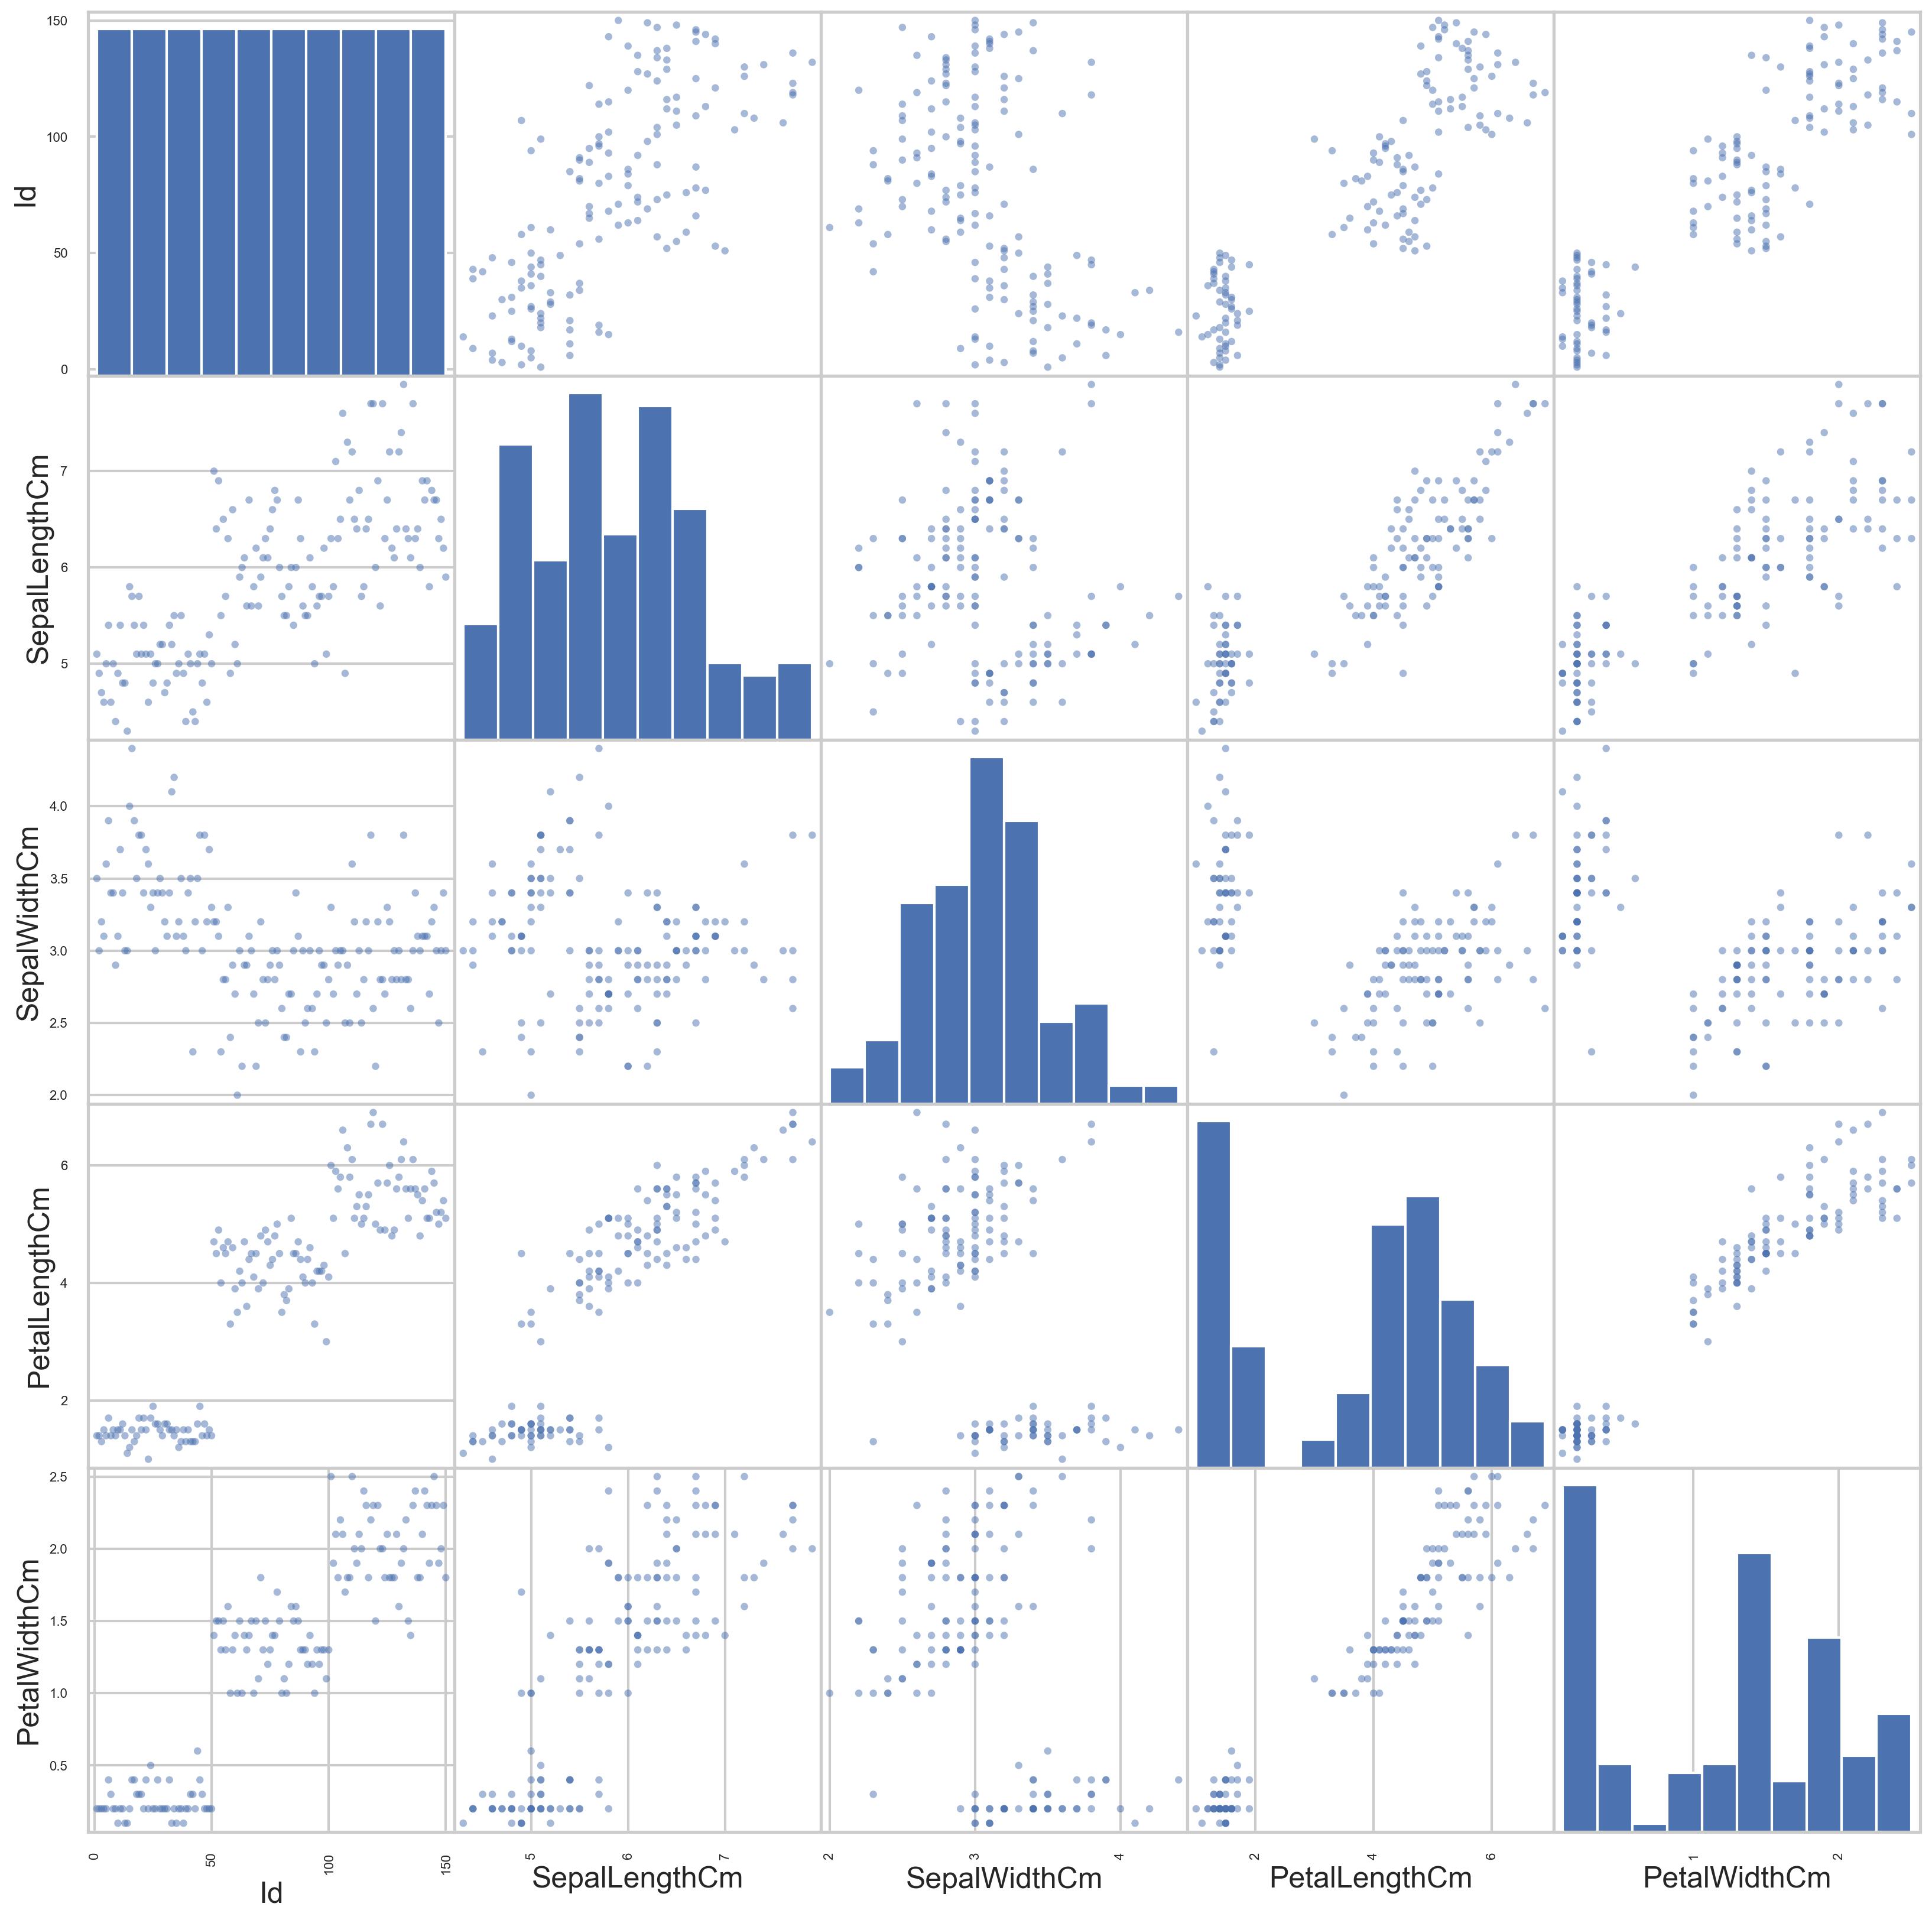

In [5]:
import pandas
from pandas.plotting import scatter_matrix


dataset = pandas.read_csv('../datasets/Iris.csv')
scatter_matrix(dataset, alpha=0.5, figsize=(20, 20))
plt.show()

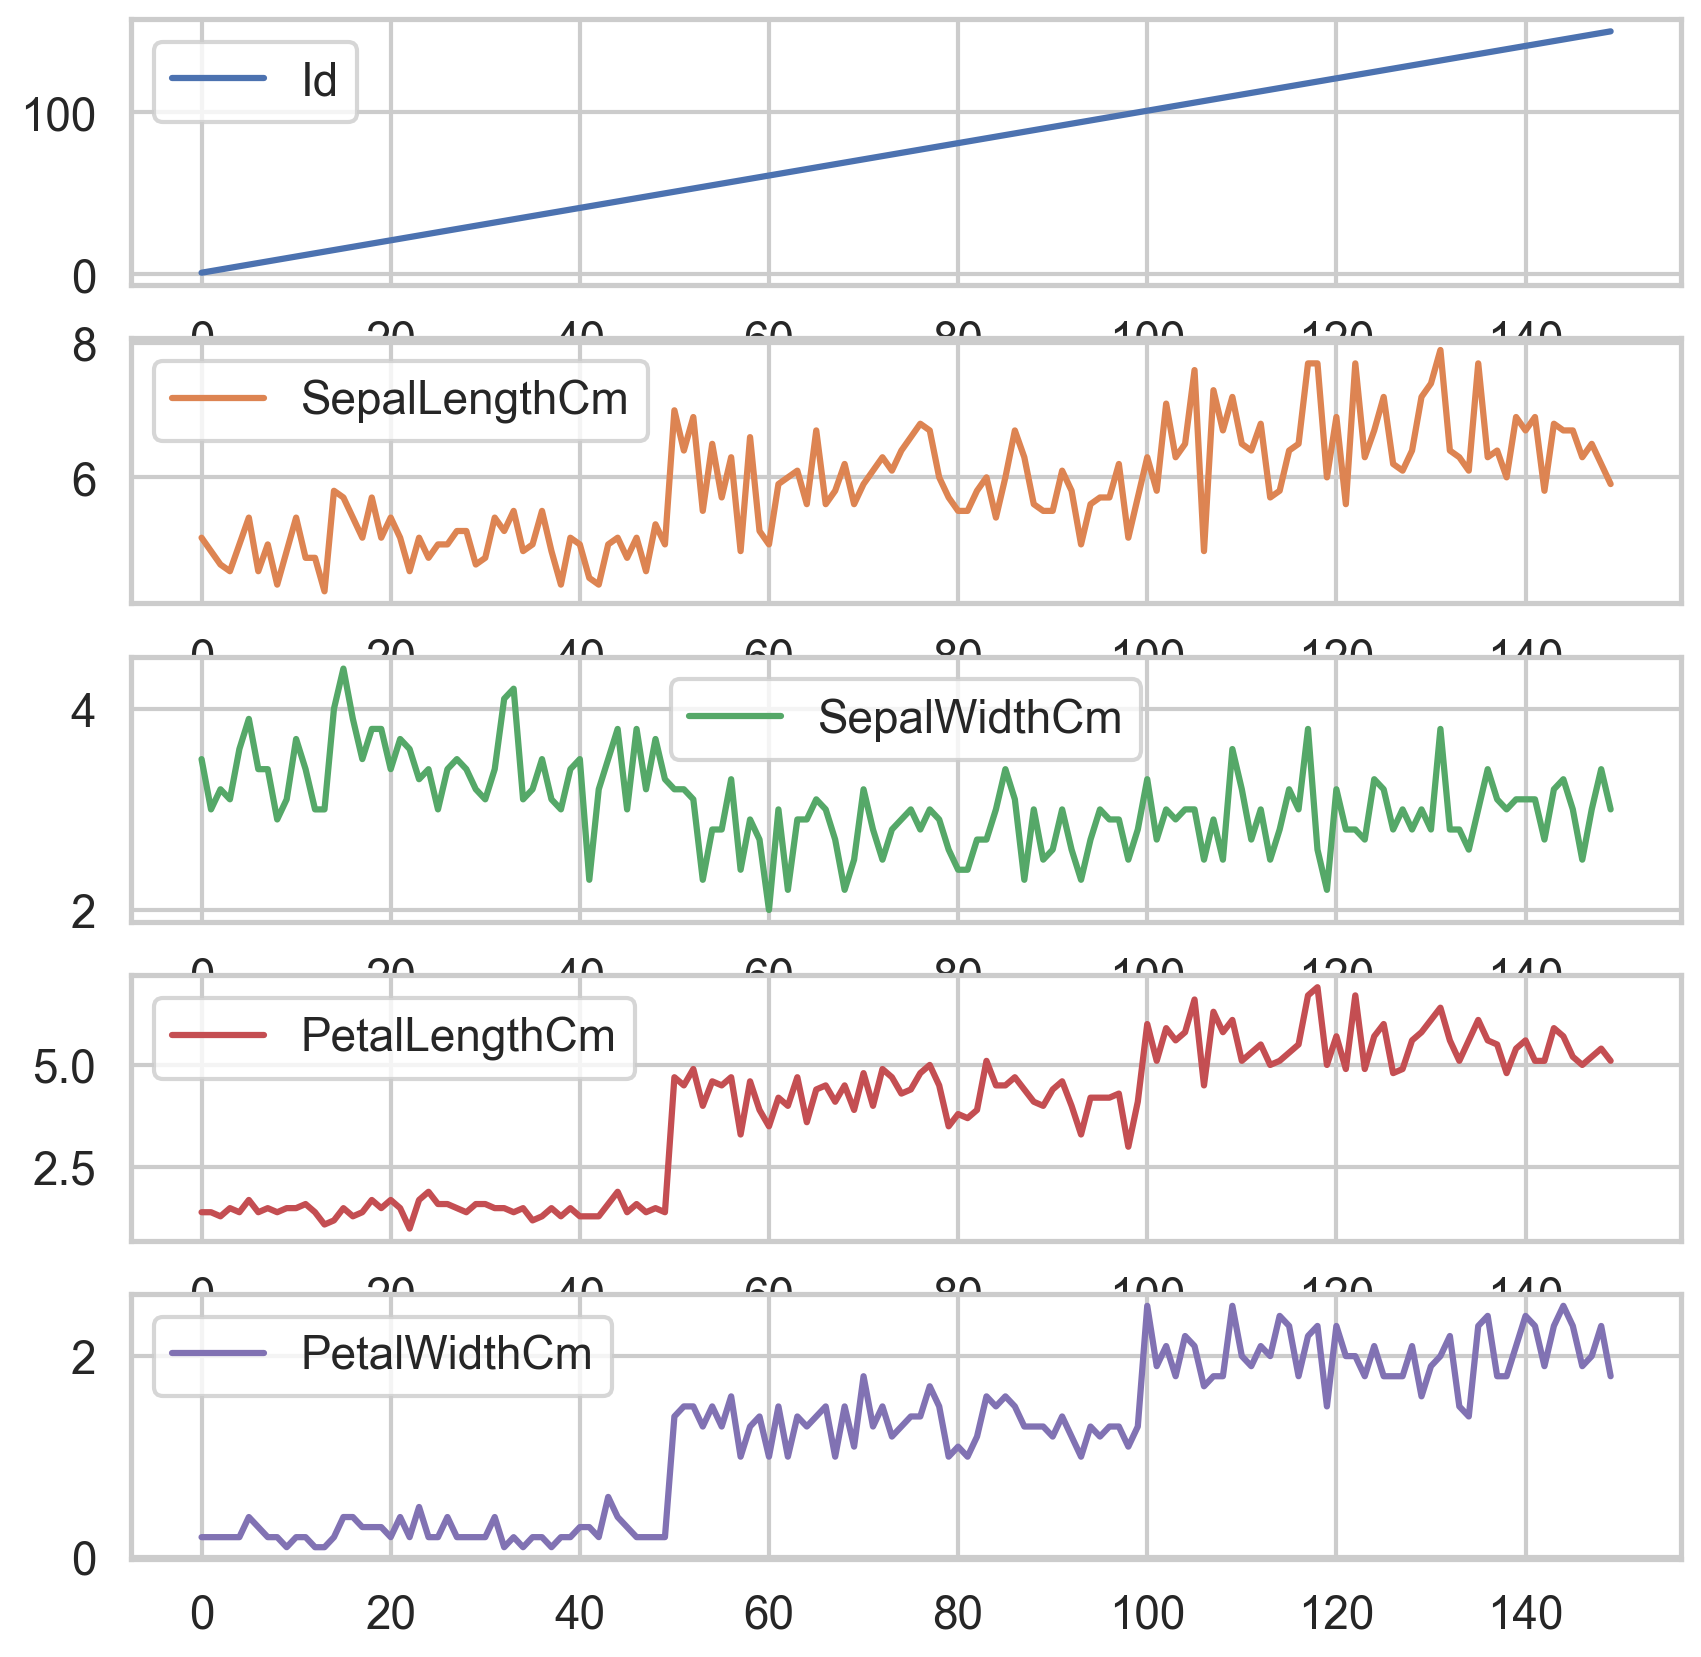

In [6]:
dataset.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

In [7]:
random.seed(123)

def separate_data():
    A = iris_dataset[0:40]
    tA = iris_dataset[40:50]
    B = iris_dataset[50:90]
    tB = iris_dataset[90:100]
    C = iris_dataset[100:140]
    tC = iris_dataset[140:150]
    train = np.concatenate((A,B,C))
    test =  np.concatenate((tA,tB,tC))
    return train,test

train_porcent = 80 # Porcent Training 
test_porcent = 20 # Porcent Test
iris_dataset = np.column_stack((iris_data.data,iris_data.target.T)) #Join X and Y
iris_dataset = list(iris_dataset)
random.shuffle(iris_dataset)

Filetrain, Filetest = separate_data()

train_X = np.array([i[:4] for i in Filetrain])
train_y = np.array([i[4] for i in Filetrain])
test_X = np.array([i[:4] for i in Filetest])
test_y = np.array([i[4] for i in Filetest])

Text(0, 0.5, 'petal width (cm)')

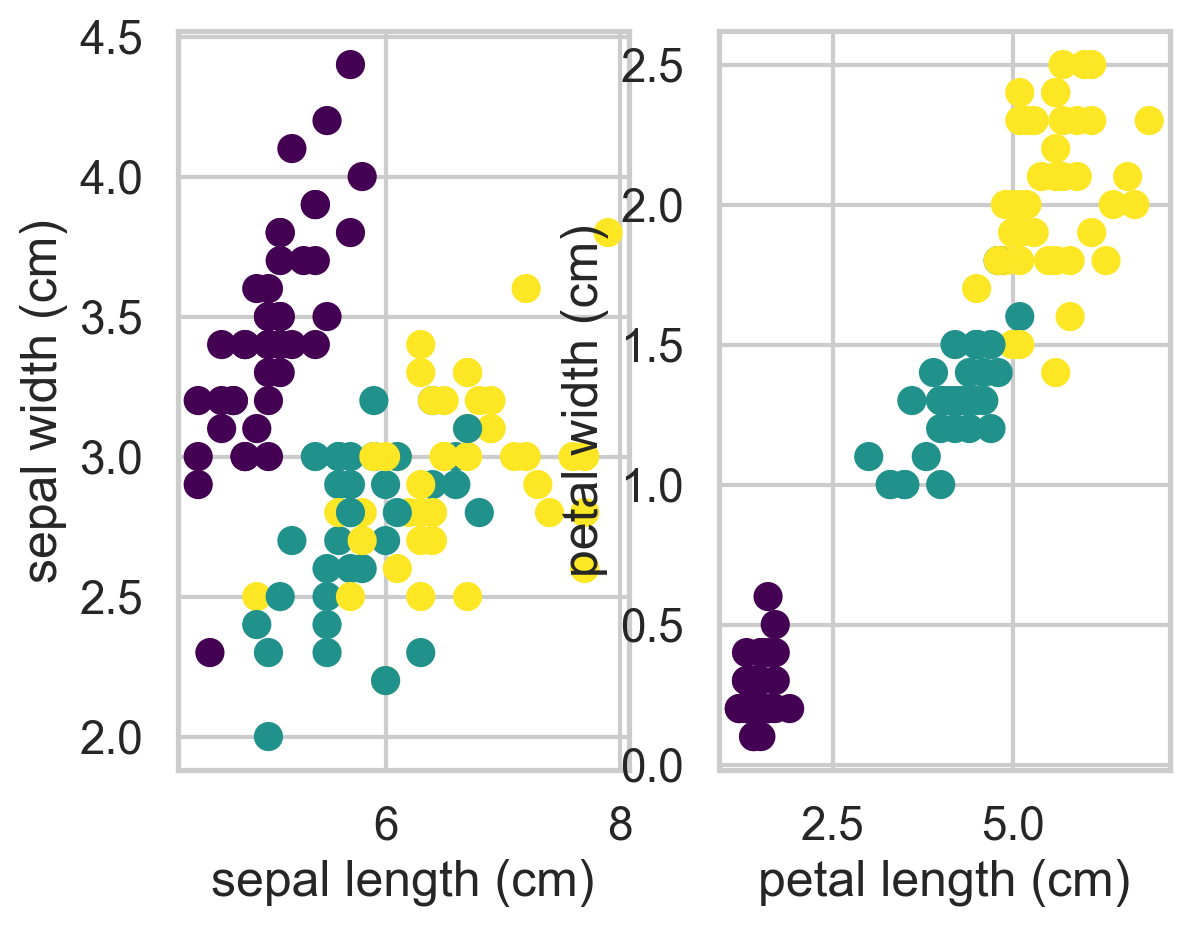

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


plt.subplot(1, 2, 1)
plt.scatter(train_X[:,0],train_X[:,1],c=train_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])

plt.subplot(1, 2, 2)
plt.scatter(train_X[:,2],train_X[:,3],c=train_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])

Text(0, 0.5, 'petal width (cm)')

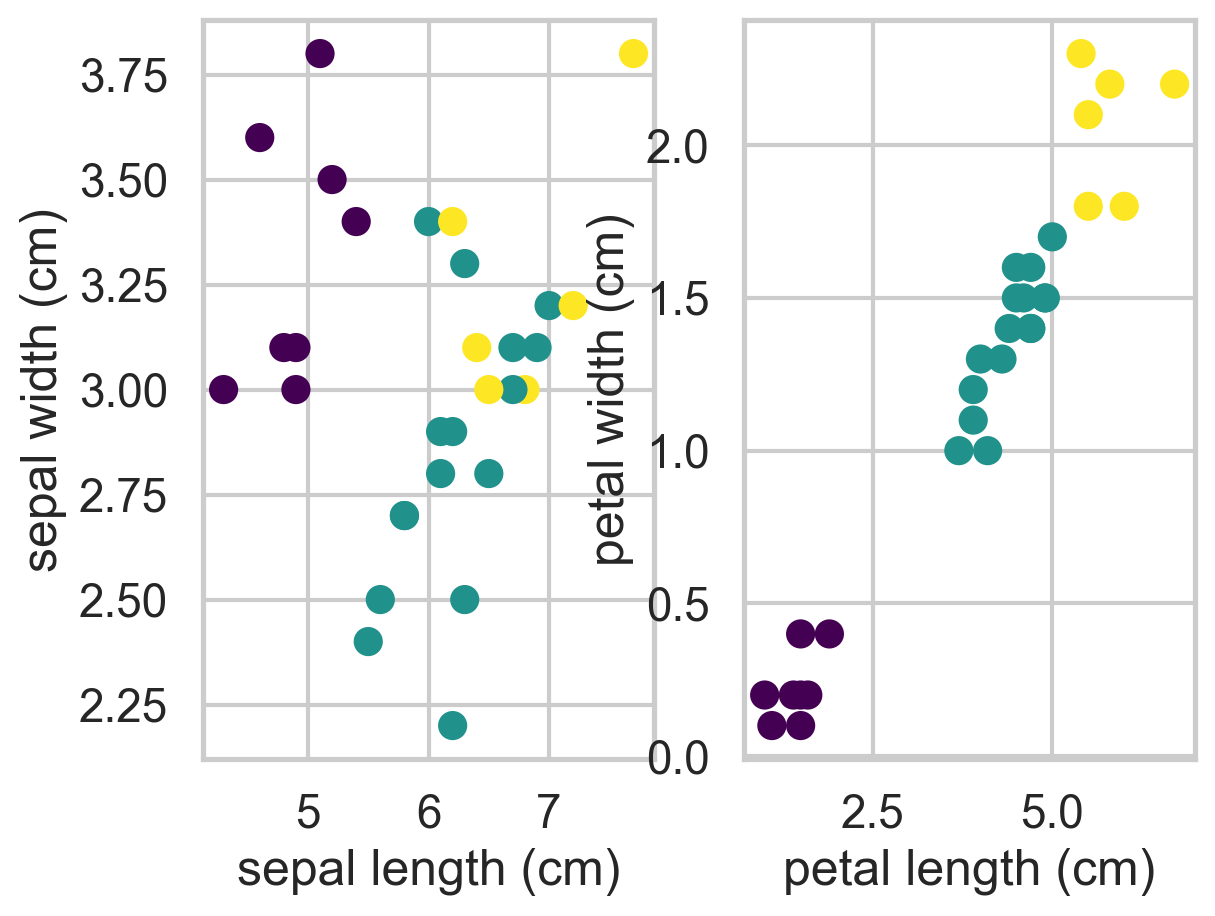

In [9]:
plt.subplot(1, 2, 1)
plt.scatter(test_X[:,0],test_X[:,1],c=test_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1]) 

plt.subplot(1, 2, 2)
plt.scatter(test_X[:,2],test_X[:,3],c=test_y,cmap=cm.viridis)
plt.xlabel(iris_data.feature_names[2])
plt.ylabel(iris_data.feature_names[3])

In [10]:
x = 0 
ativation = {(lambda x: 1/(1 + np.exp(-x)))}
deriv = {(lambda x: x*(1-x))}

In [11]:
activation_tang = {(lambda x: np.tanh(x))}
deriv_tang = {(lambda x: 1-x**2)}
  

In [12]:
activation_ReLU = {(lambda x: x*(x > 0))}
deriv_ReLU = {(lambda x: 1 * (x>0))}

In [18]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random

class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None):     
        if (params == None):
            self.inputLayer = 4                        # Input Layer
            self.hiddenLayer = 5                       # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.iasHiddenValue = -1                   # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]
            
              
        'Starting Bias and Weights'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3 
        
    pass
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }
    
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        'Stage 3 - Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
                
    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    def predict(self, X, y):
        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        array_score = []
        for i in range(len(my_predictions)):
            if my_predictions[i] == 0: 
                array_score.append([i, 'Iris-setosa', my_predictions[i], y[i]])
            elif my_predictions[i] == 1:
                 array_score.append([i, 'Iris-versicolour', my_predictions[i], y[i]])
            elif my_predictions[i] == 2:
                 array_score.append([i, 'Iris-virginica', my_predictions[i], y[i]])
        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
        return my_predictions, dataframe

    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}
                    
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)
        
        plt.plot(W0[0])
        plt.title('Weight Hidden update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
        plt.ylabel('Value Weight')
        plt.show()
        
        plt.plot(W1[0])
        plt.title('Weight Output update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.ylabel('Value Weight')
        plt.show()

        return self

In [19]:
def show_test():
    ep1 = [0,100,200,300,400,500,600,700,800,900,1000,1500,2000]
    h_5 = [0,60,70,70,83.3,93.3,96.7,86.7,86.7,76.7,73.3,66.7,66.7]
    h_4 = [0,40,70,63.3,66.7,70,70,70,70,66.7,66.7,43.3,33.3]
    h_3 = [0,46.7,76.7,80,76.7,76.7,76.6,73.3,73.3,73.3,73.3,76.7,76.7]
    plt.figure(figsize=(10,4))
    l1, = plt.plot(ep1, h_3, "--",color='b',label="node-3", marker=11)
    l2, = plt.plot(ep1, h_4, "--",color='g',label="node-4", marker=8)
    l3, = plt.plot(ep1, h_5, "--",color='r',label="node-5", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("number of Epochs")
    plt.ylabel("% Hits")
    plt.title("Number of Hidden Layers - Performance")
    
    ep2 = [0,100,200,300,400,500,600,700]
    tanh = [0.18,0.027,0.025,0.022,0.0068,0.0060,0.0057,0.00561]
    sigm = [0.185,0.0897,0.060,0.0396,0.0343,0.0314,0.0296,0.0281]
    Relu = [0.185,0.05141,0.05130,0.05127,0.05124,0.05123,0.05122,0.05121]
    plt.figure(figsize=(10,4))
    l1 , = plt.plot(ep2, tanh, "--",color='b',label="Hyperbolic Tangent",marker=11)
    l2 , = plt.plot(ep2, sigm, "--",color='g',label="Sigmoide", marker=8)
    l3 , = plt.plot(ep2, Relu, "--",color='r',label="ReLu", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("Activation Functions - Performance")
    
    fig, ax = plt.subplots()
    names = ["Hyperbolic Tangent","Sigmoide","ReLU"]
    x1 = [2.0,4.0,6.0]
    plt.bar(x1[0], 53.4,0.4,color='b')
    plt.bar(x1[1], 96.7,0.4,color='g')
    plt.bar(x1[2], 33.2,0.4,color='r')
    plt.xticks(x1,names)
    plt.ylabel('% Hits')
    plt.title('Hits - Activation Functions')
    plt.show()

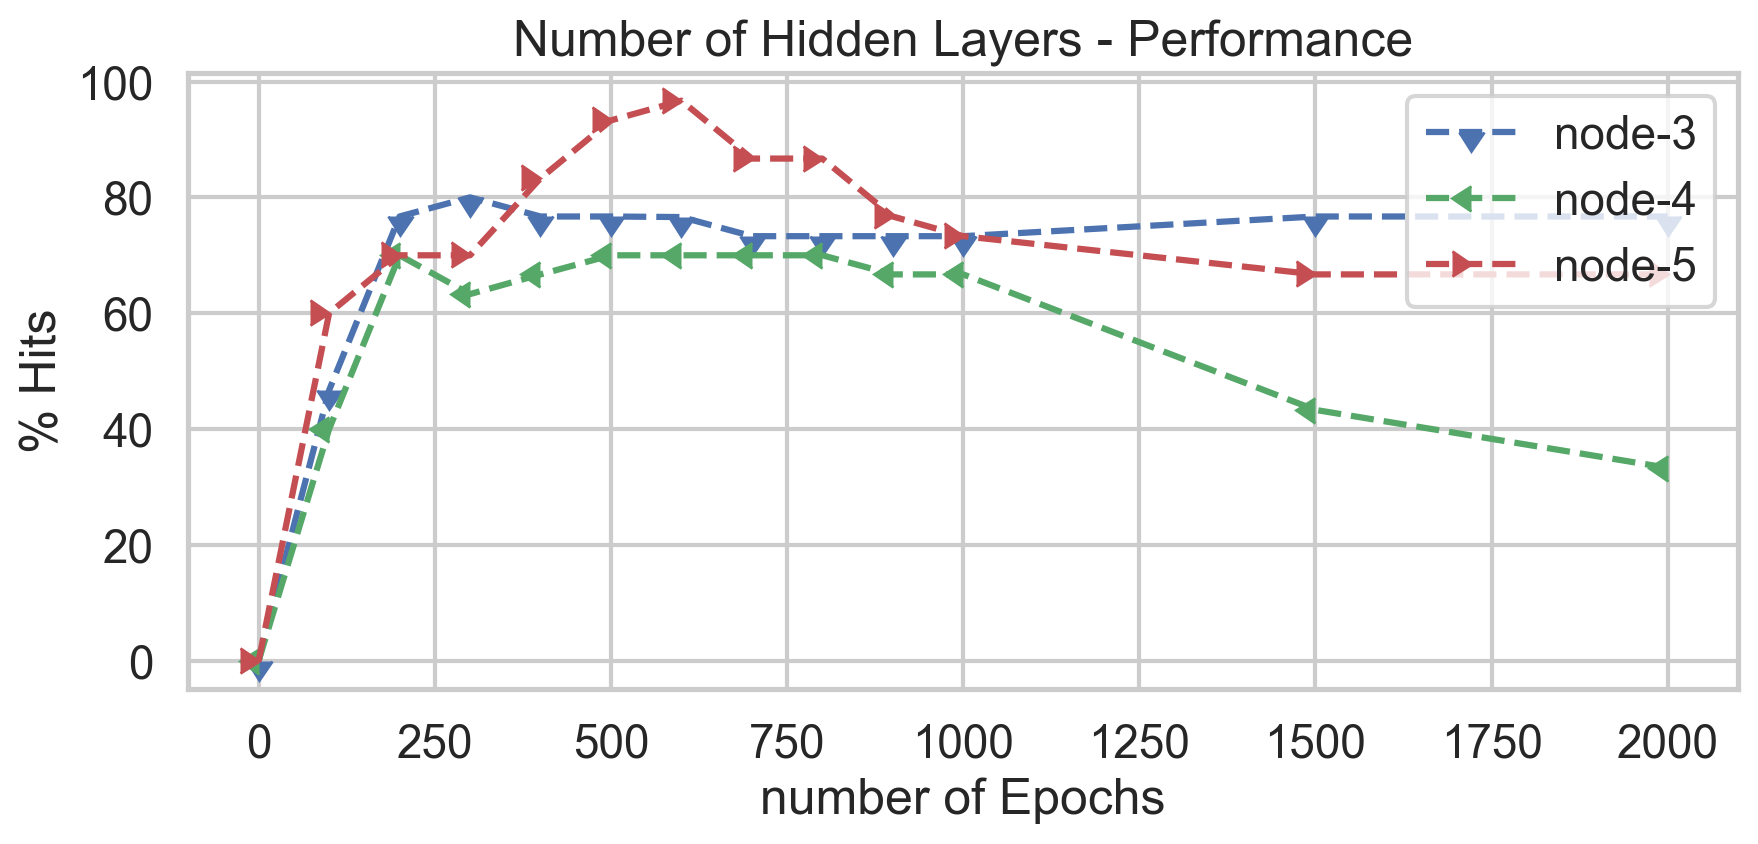

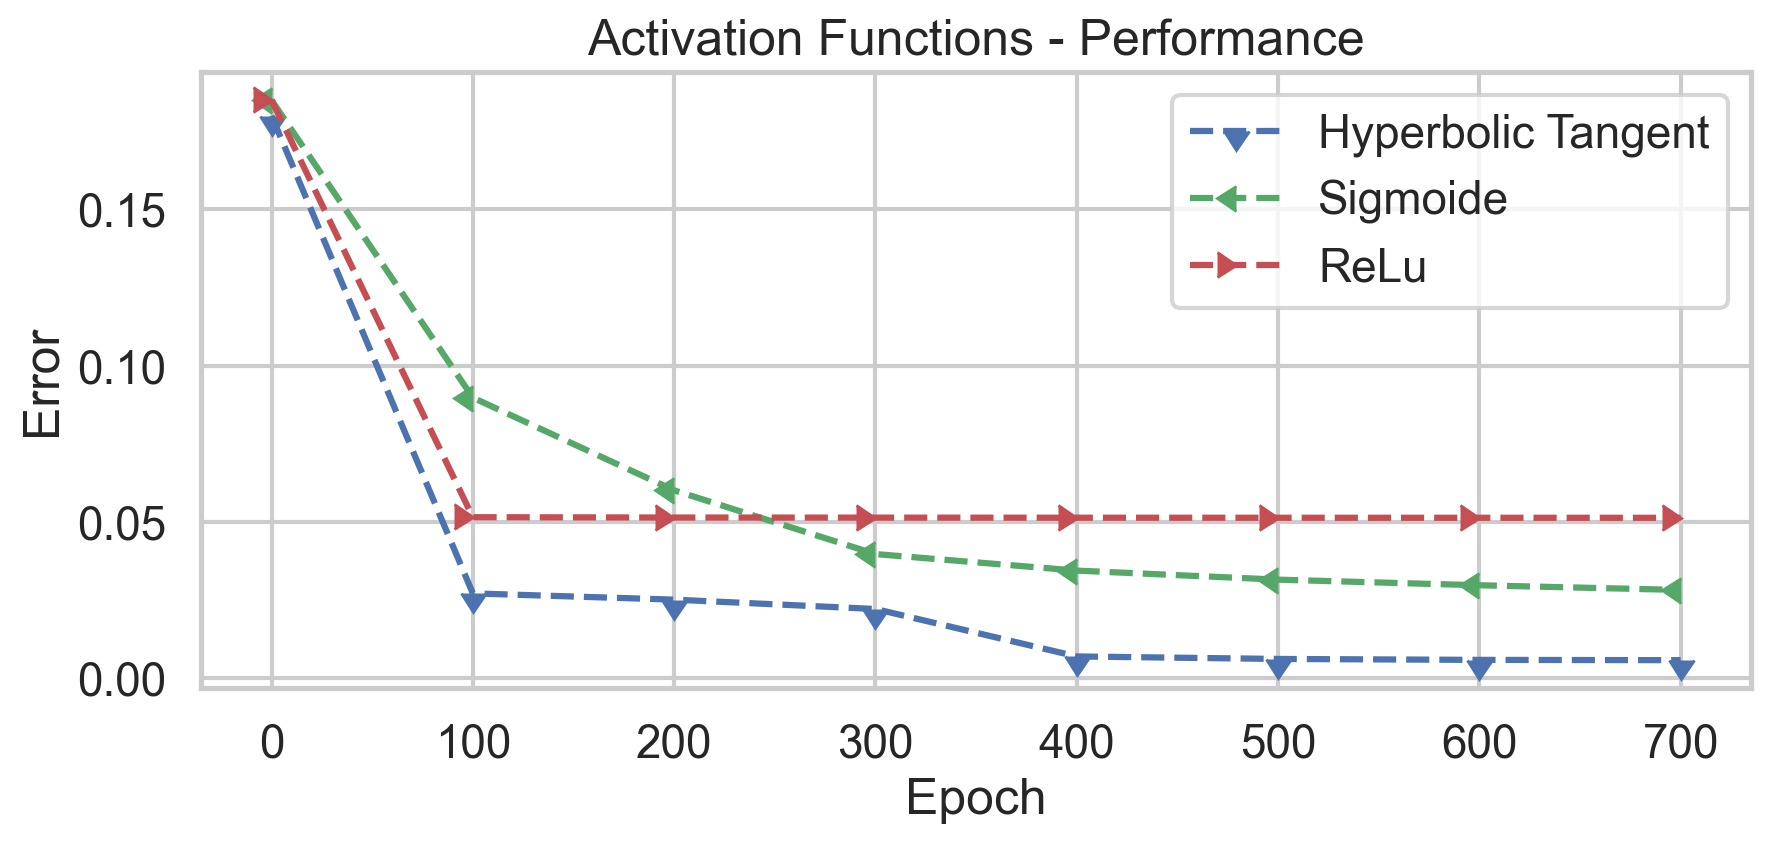

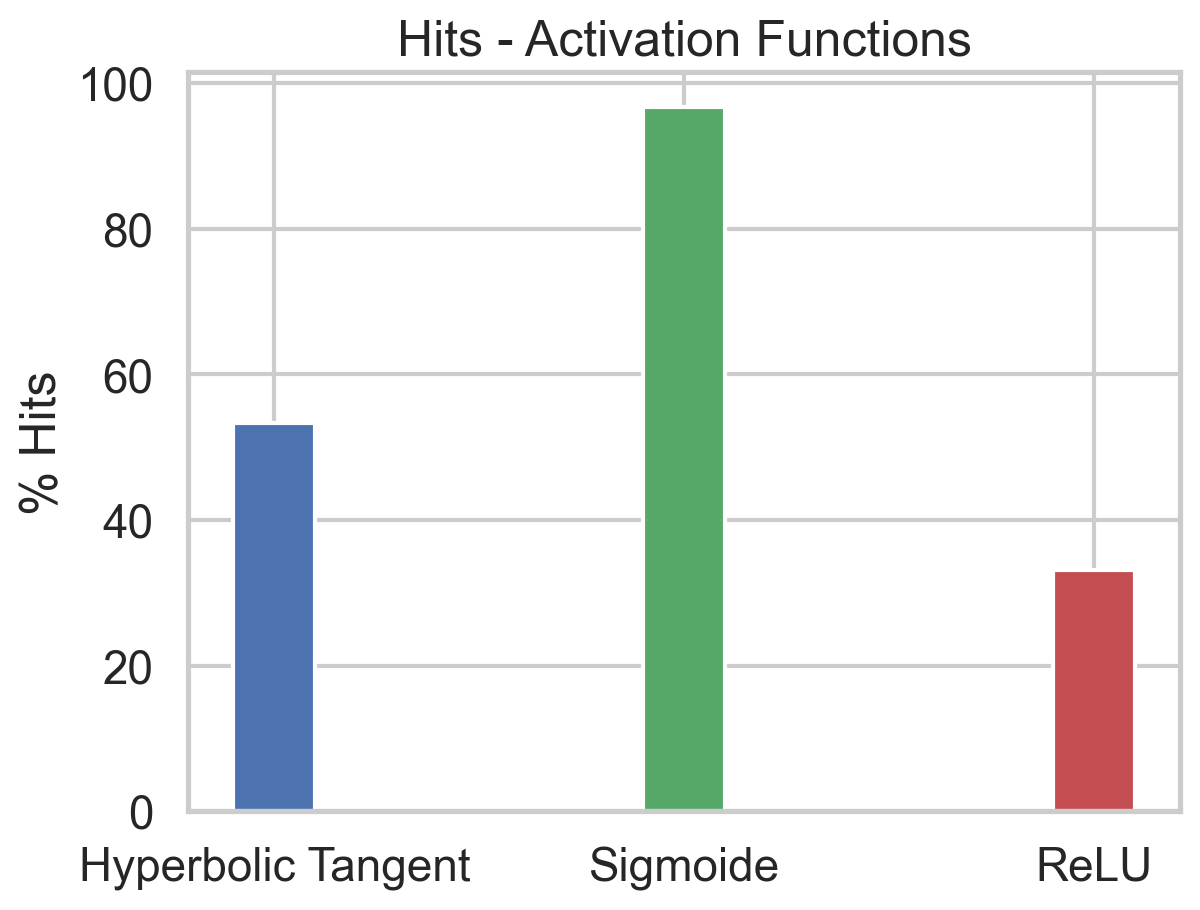

In [20]:
show_test()

Epoch  1 - Total Error:  0.08939914265311076
Epoch  50 - Total Error:  0.05376852115527734
Epoch  100 - Total Error:  0.03773105860576402
Epoch  150 - Total Error:  0.0311644504972821
Epoch  200 - Total Error:  0.028406909135682057
Epoch  250 - Total Error:  0.02669256194214157
Epoch  300 - Total Error:  0.0252400340593952
Epoch  350 - Total Error:  0.02384525367109565
Epoch  400 - Total Error:  0.02242746475447137
Epoch  450 - Total Error:  0.020948415886624147
Epoch  500 - Total Error:  0.01936513137210057
Epoch  550 - Total Error:  0.017597424493928975
Epoch  600 - Total Error:  0.015792170595649142
Epoch  650 - Total Error:  0.014194648016335605
Epoch  700 - Total Error:  0.012855583329293764


C:\Users\HP\AppData\Local\Temp\ipykernel_7084\3621666073.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)


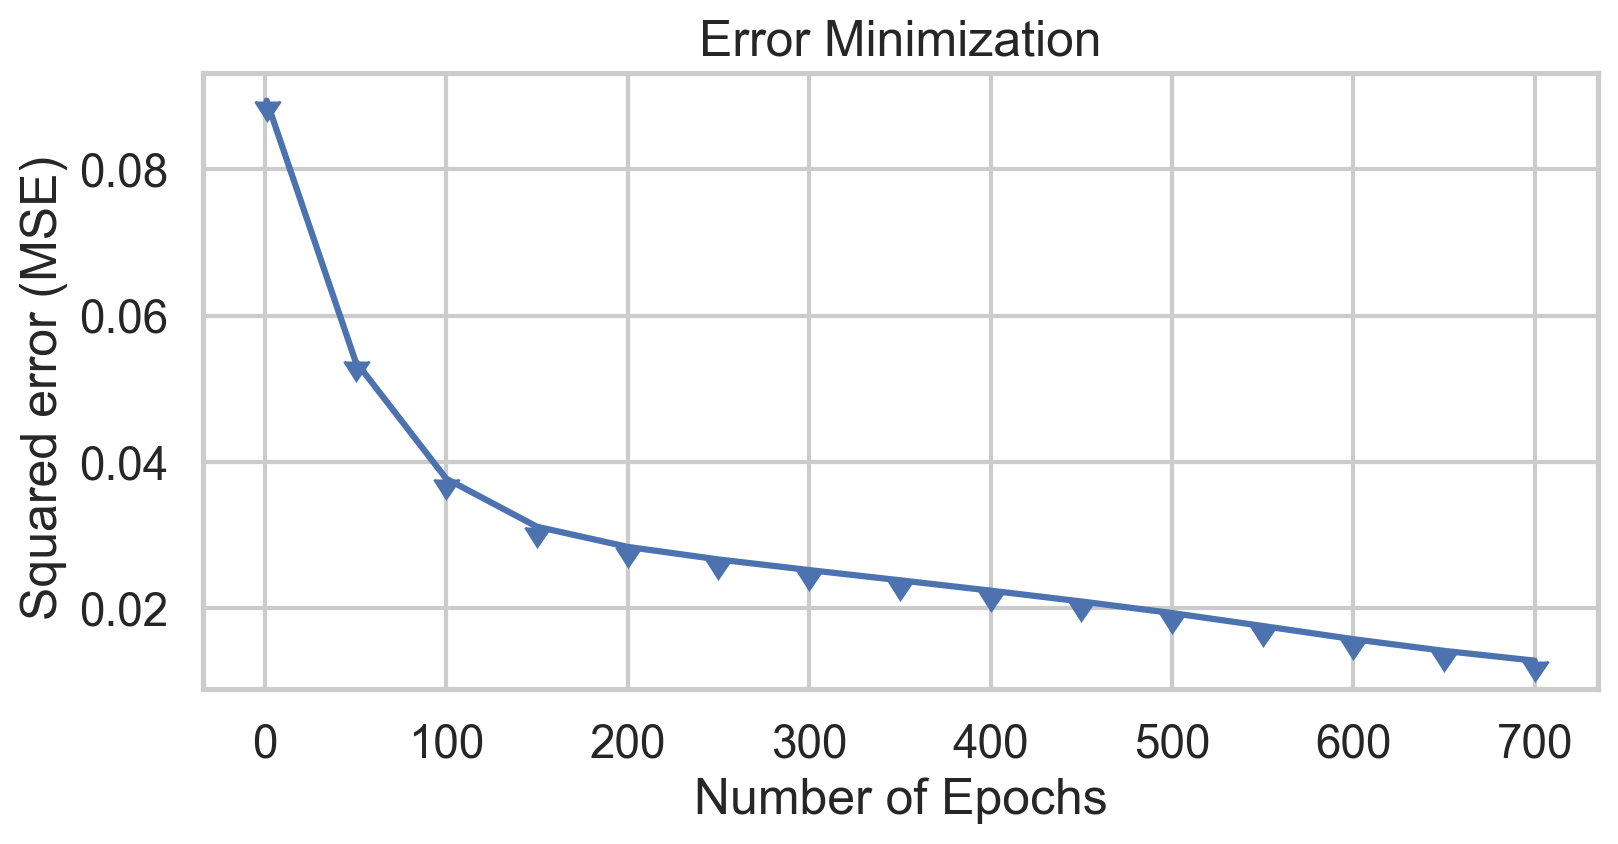

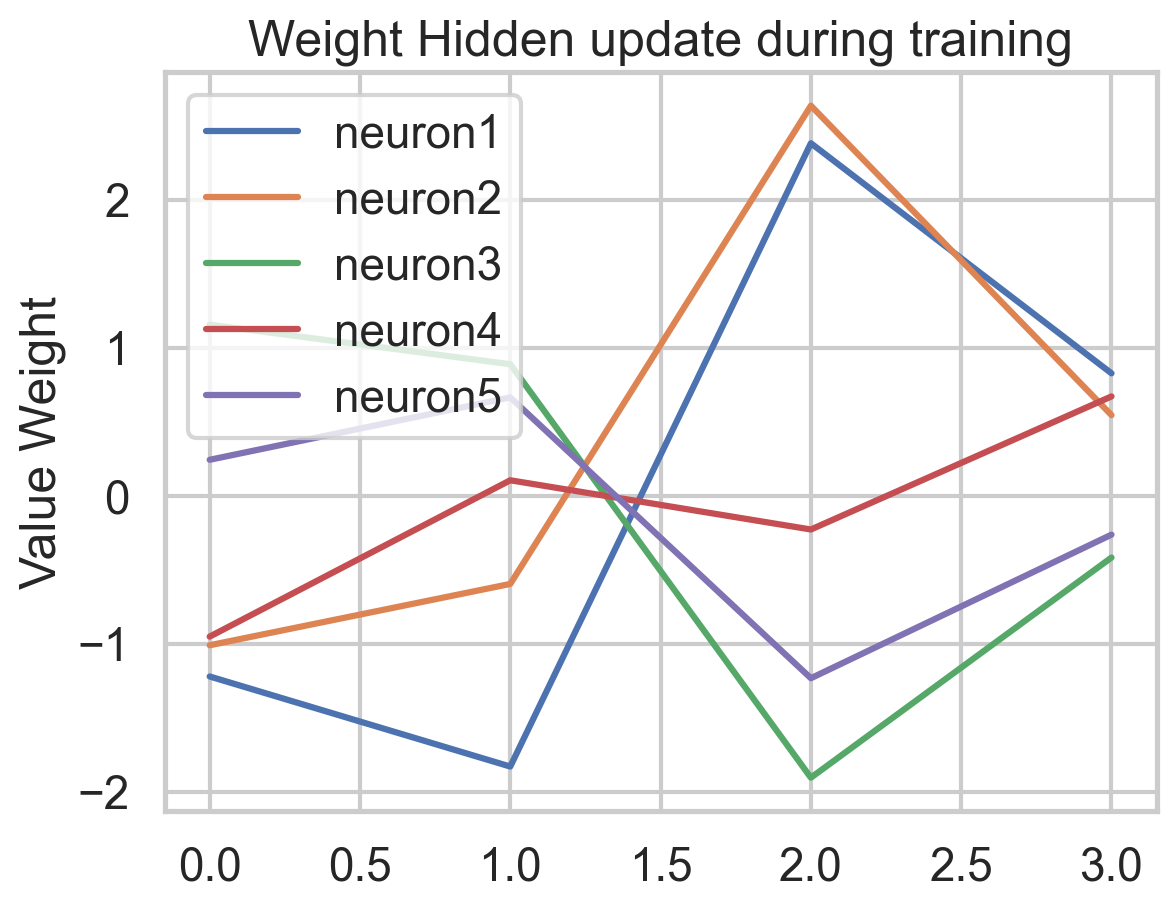

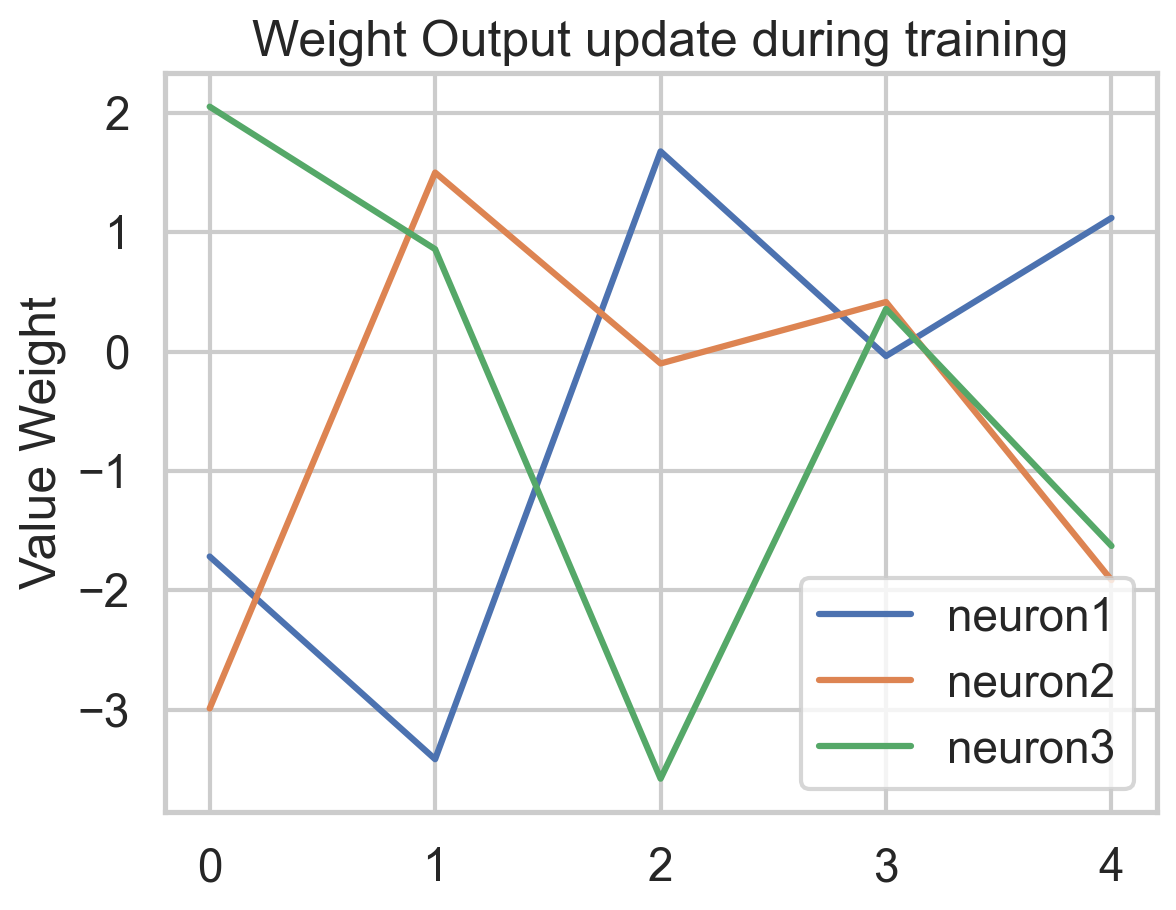

AttributeError: 'MultiLayerPerceptron' object has no attribute 'params'

AttributeError: 'MultiLayerPerceptron' object has no attribute 'params'

AttributeError: 'MultiLayerPerceptron' object has no attribute 'params'

In [21]:
dictionary = {'InputLayer':4, 'HiddenLayer':5, 'OutputLayer':3,
              'Epocas':700, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(train_X,train_y)

In [22]:
prev, dataframe = Perceptron.predict(test_X, test_y)
hits = n_set = n_vers = n_virg = 0
score_set = score_vers = score_virg = 0
for j in range(len(test_y)):
    if(test_y[j] == 0): n_set += 1
    elif(test_y[j] == 1): n_vers += 1
    elif(test_y[j] == 2): n_virg += 1
        
for i in range(len(test_y)):
    if test_y[i] == prev[i]: 
        hits += 1
    if test_y[i] == prev[i] and test_y[i] == 0:
        score_set += 1
    elif test_y[i] == prev[i] and test_y[i] == 1:
        score_vers += 1
    elif test_y[i] == prev[i] and test_y[i] == 2:
        score_virg += 1    
         
hits = (hits / len(test_y)) * 100
faults = 100 - hits

In [23]:
dataframe

,_id,class,output,hoped_output
0,0,Iris-setosa,0,0.0
1,1,Iris-versicolour,1,1.0
2,2,Iris-versicolour,1,1.0
3,3,Iris-setosa,0,0.0
4,4,Iris-versicolour,1,1.0
5,5,Iris-versicolour,1,1.0
6,6,Iris-versicolour,1,1.0
7,7,Iris-versicolour,1,1.0
8,8,Iris-setosa,0,0.0
9,9,Iris-virginica,2,2.0


Porcents : 96.67 % hits and 3.33 % faults
Total samples of test 150
*Iris-Setosa: 8 samples
*Iris-Versicolour: 16 samples
*Iris-Virginica: 6 samples


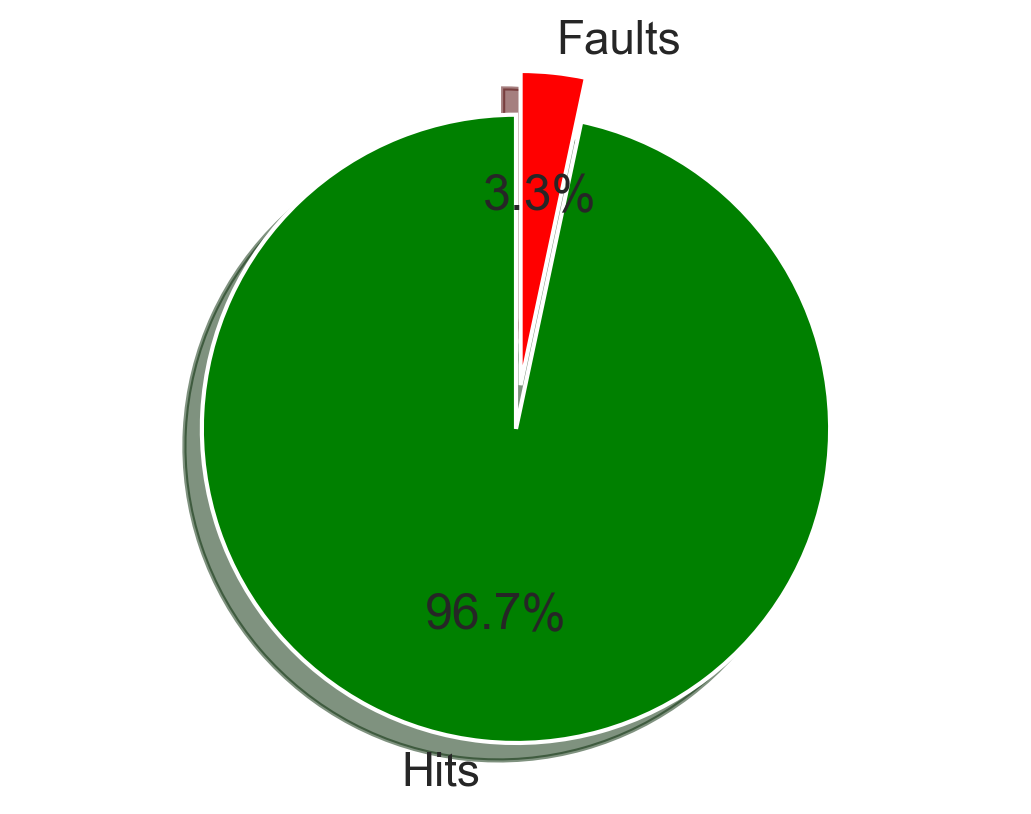

In [24]:
graph_hits = []
print("Porcents :","%.2f"%(hits),"% hits","and","%.2f"%(faults),"% faults")
print("Total samples of test",n_samples)
print("*Iris-Setosa:",n_set,"samples")
print("*Iris-Versicolour:",n_vers,"samples")
print("*Iris-Virginica:",n_virg,"samples")

graph_hits.append(hits)
graph_hits.append(faults)
labels = 'Hits', 'Faults';
sizes = [96.5, 3.3]
explode = (0, 0.14)

fig1, ax1 = plt.subplots();
ax1.pie(graph_hits, explode=explode,colors=['green','red'],labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

- Acurracy Iris-Setosa: 100.00 %
- Acurracy Iris-Versicolour: 93.75 %
- Acurracy Iris-Virginica: 100.00 %


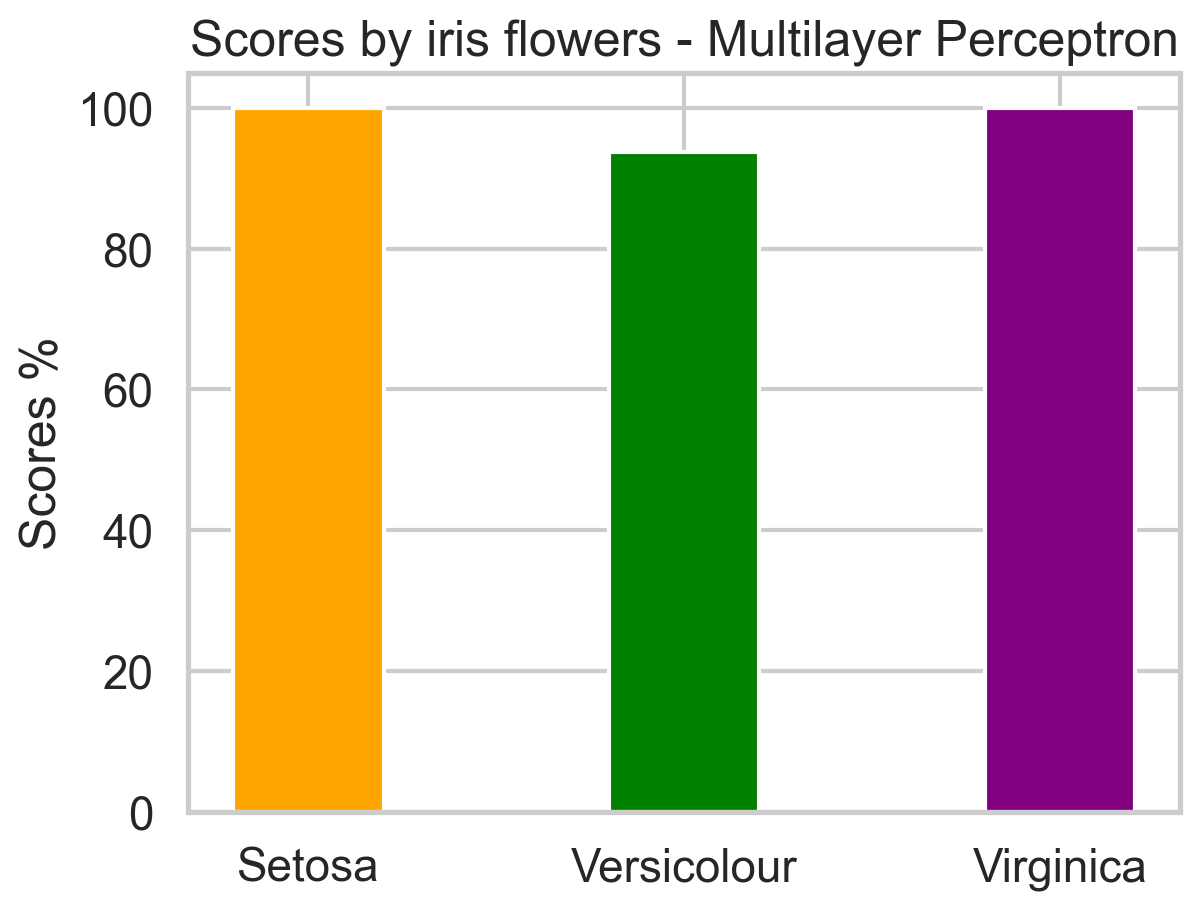

In [25]:
acc_set = (score_set/n_set)*100
acc_vers = (score_vers/n_vers)*100
acc_virg = (score_virg/n_virg)*100
print("- Acurracy Iris-Setosa:","%.2f"%acc_set, "%")
print("- Acurracy Iris-Versicolour:","%.2f"%acc_vers, "%")
print("- Acurracy Iris-Virginica:","%.2f"%acc_virg, "%")
names = ["Setosa","Versicolour","Virginica"]
x1 = [2.0,4.0,6.0]
fig, ax = plt.subplots()
r1 = plt.bar(x1[0], acc_set,color='orange',label='Iris-Setosa')
r2 = plt.bar(x1[1], acc_vers,color='green',label='Iris-Versicolour')
r3 = plt.bar(x1[2], acc_virg,color='purple',label='Iris-Virginica')
plt.ylabel('Scores %')
plt.xticks(x1, names);plt.title('Scores by iris flowers - Multilayer Perceptron')
plt.show()